In [21]:
import pandas as pd
import yfinance as yf
from datetime import datetime

In [22]:
start=datetime(2019,1,1)
end=datetime.today().date()
# end.date()
df=yf.download("AAPL",start,end)
df=df.reset_index().drop(["Adj Close","Date"],axis=1)

[*********************100%***********************]  1 of 1 completed


In [23]:
df
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1118 non-null   float64
 1   High    1118 non-null   float64
 2   Low     1118 non-null   float64
 3   Close   1118 non-null   float64
 4   Volume  1118 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 43.8 KB


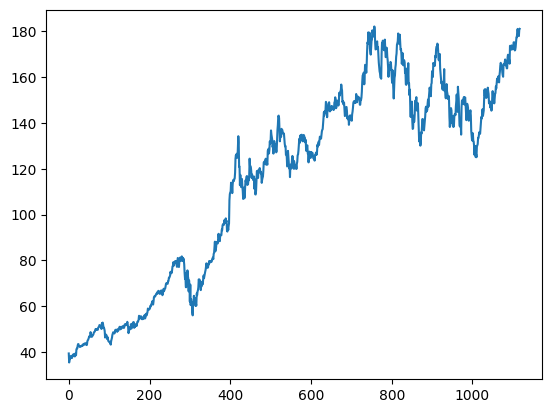

In [24]:
plt.plot(df["Close"])
df.info()

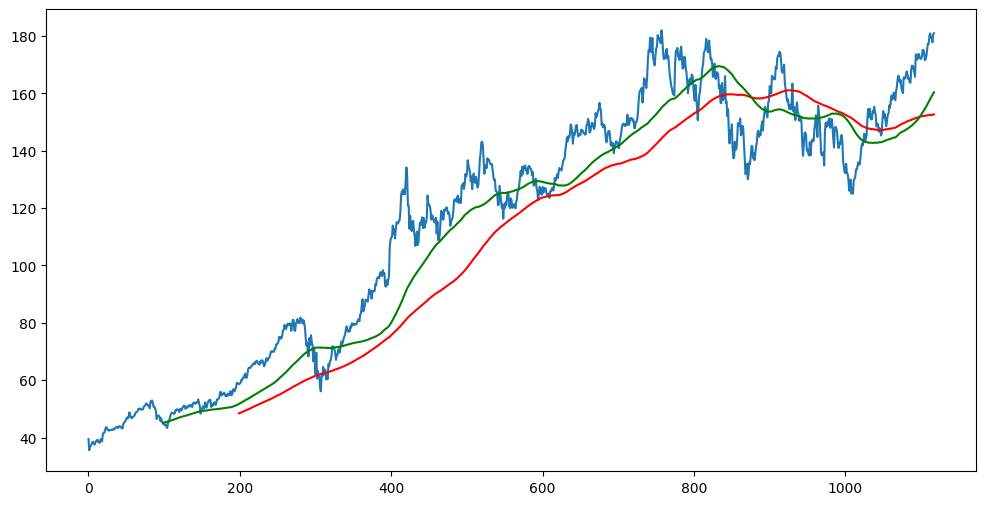

In [25]:
ma200=df.Close.rolling(200).mean()
ma100=df.Close.rolling(100).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,"r")
plt.plot(ma100,"g")

In [26]:
df.shape

(1118, 5)

In [27]:
# split 70 30
i=int(len(df)*0.7)
data_training=pd.DataFrame(df.Close[0:i])
data_test=pd.DataFrame(df.Close[i:])
print(data_test.shape)
print(data_training.shape)
print(df.shape)

(336, 1)
(782, 1)
(1118, 5)


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_training_array=scaler.fit_transform(data_training)
data_training_array.shape


(782, 1)

In [30]:
x_train=[]
y_train=[]
import numpy as np
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
my_x_train=np.array(x_train)
my_y_train=np.array(y_train)
# Y_traina

In [32]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(my_x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=56,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=50,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 56)           23968     
                                                                 
 dropout_1 (Dropout)         (None, 100, 56)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           43840     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)               

In [34]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(my_x_train,my_y_train,epochs=50)

Epoch 1/50
22/22 [==============================] - 11s 237ms/step - loss: 0.1150
Epoch 2/50
22/22 [==============================] - 5s 213ms/step - loss: 0.0355
Epoch 3/50
22/22 [==============================] - 5s 234ms/step - loss: 0.0215
Epoch 4/50
22/22 [==============================] - 4s 202ms/step - loss: 0.0212
Epoch 5/50
22/22 [==============================] - 4s 188ms/step - loss: 0.0193
Epoch 6/50
22/22 [==============================] - 5s 205ms/step - loss: 0.0167
Epoch 7/50
22/22 [==============================] - 4s 196ms/step - loss: 0.0169
Epoch 8/50
22/22 [==============================] - 4s 197ms/step - loss: 0.0156
Epoch 9/50
22/22 [==============================] - 4s 187ms/step - loss: 0.0153
Epoch 10/50
22/22 [==============================] - 4s 190ms/step - loss: 0.0150
Epoch 11/50
22/22 [==============================] - 4s 189ms/step - loss: 0.0148
Epoch 12/50
22/22 [==============================] - 4s 181ms/step - loss: 0.0140
Epoch 13/50
22/22 [=====

In [35]:
model.save('keras_model.h5')

In [36]:
data_test.tail()

,Close
1113,179.580002
1114,179.210007
1115,177.820007
1116,180.570007
1117,180.960007


In [37]:
past_100=data_training.tail(100)
final_df=past_100.append(data_test,ignore_index=True)
# final_df

D:\Temp\ipykernel_19680\4017944533.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100.append(data_test,ignore_index=True)


In [38]:
final_df.head()

,Close
0,148.789993
1,146.059998
2,142.940002
3,143.429993
4,145.850006


In [39]:
input_data=scaler.fit_transform(final_df)
input_data.shape

(436, 1)

In [40]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
# x_test.shape
#     X_train.append(data_training_array[i-100:i])
    # Y_train.append(data_training_array[i:0])
    

x_test=np.array(x_test)
y_test=np.array(y_test)
# x_test = x_test.astype(np.float64)
# y_test = y_test.astype(np.float64)
# print(x_test[1])

In [ ]:
print(y_test[1])
# print(x_test[1])
print(x_test)

In [41]:
y_predict=model.predict(x_test)
y_predict.shape


11/11 [==============================] - 2s 76ms/step


(336, 1)

In [ ]:
y_predict

In [42]:
scaler.scale_
# y_test.shape

array([0.01754694])

In [43]:
scale_factor=1 / 0.01754694
y_predict=scale_factor*y_predict
y_test=scale_factor* y_test

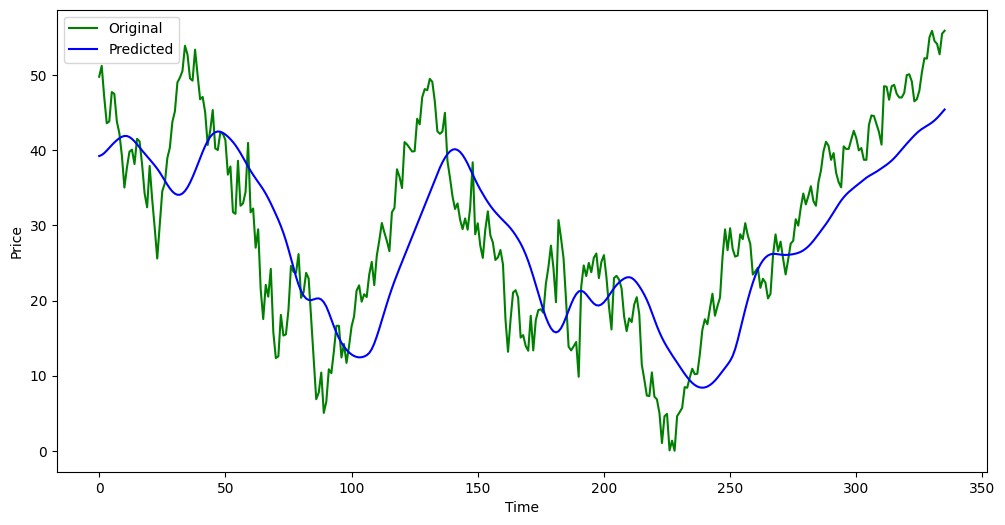

In [46]:
plt.figure(figsize=(12,6))
plt.plot(y_test,"g",label="Original")
plt.plot(y_predict,"b",label="Predicted")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [47]:
y_predict

array([[39.249126],
       [39.385983],
       [39.637844],
       [39.973557],
       [40.345215],
       [40.709503],
       [41.049423],
       [41.358395],
       [41.620747],
       [41.817966],
       [41.926434],
       [41.91557 ],
       [41.778194],
       [41.5308  ],
       [41.20091 ],
       [40.81164 ],
       [40.39685 ],
       [39.986656],
       [39.593212],
       [39.207256],
       [38.810223],
       [38.407417],
       [37.995552],
       [37.55984 ],
       [37.076084],
       [36.543518],
       [35.986786],
       [35.439274],
       [34.941772],
       [34.53099 ],
       [34.2387  ],
       [34.086876],
       [34.092575],
       [34.262375],
       [34.593067],
       [35.078995],
       [35.704765],
       [36.439007],
       [37.244347],
       [38.09699 ],
       [38.965508],
       [39.806396],
       [40.582764],
       [41.2603  ],
       [41.799377],
       [42.182854],
       [42.421883],
       [42.519707],
       [42.48448 ],
       [42.340057],
